[IPython Notebook](beaming_boosting.ipynb) |  [Python Script](beaming_boosting.py)

Beaming and Boosting (not yet implemented)
============================

Setup
-----------------------------

As always, let's do imports and initialize a logger and a new bundle.  See [Building a System](building_a_system.html) for more details.

In [1]:
%matplotlib inline

In [2]:
import phoebe
from phoebe import u # units
import numpy as np
import matplotlib.pyplot as plt

logger = phoebe.logger(clevel='INFO')

b = phoebe.Bundle.default_binary()

/usr/local/lib/python2.7/dist-packages/astropy/units/quantity.py:732: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  return super(Quantity, self).__eq__(other)



We'll add LC, RV, and MESH datasets so that we can see how they're each affected by beaming and boosting.

In [3]:
times = np.linspace(0,3,101)

In [4]:
b.add_dataset('LC', time=times, dataset='lc01')

<ParameterSet: 18 parameters | methods: LC, LC_dep>

In [5]:
b.add_dataset('RV', time=times, dataset='rv01')

<ParameterSet: 24 parameters | methods: RV, RV_dep>

In [6]:
b.add_dataset('MESH', time=times[::10], dataset='mesh01')

<ParameterSet: 1 parameters>

Relevant Parameters
---------------------------------

In [7]:
b.add_compute(compute='mycompute')

<ParameterSet: 19 parameters | qualifiers: dynamics_method, eclipse_alg, gridsize, stepsize, lc_method, atm, enabled, ltte, rv_grav, orbiterror, rv_method, etv_method, maxpoints, delta, etv_tol, store_mesh, distortion_method, subdiv_num, mesh_method>

In [8]:
#print b['boosting_alg']
# not yet implemented

In [9]:
#print b['boosting_alg'].choices
# not yet implemented

Influence on Light Curves (fluxes)
----------------------------

In [10]:
b.run_compute(compute='mycompute', model='boosting_none')

/home/kyle/.local/lib/python2.7/site-packages/phoebe/backend/mesh.py:1862: DeprecationWarning: PyArray_FromDims: use PyArray_SimpleNew.
  the_grid = cmarching.discretize(delta, maxpoints, *mesh_args)[:-2]
/home/kyle/.local/lib/python2.7/site-packages/phoebe/backend/mesh.py:1862: DeprecationWarning: PyArray_FromDimsAndDataAndDescr: use PyArray_NewFromDescr.
  the_grid = cmarching.discretize(delta, maxpoints, *mesh_args)[:-2]
/home/kyle/.local/lib/python2.7/site-packages/phoebe/backend/mesh.py:1862: DeprecationWarning: PyArray_FromDims: use PyArray_SimpleNew.
  the_grid = cmarching.discretize(delta, maxpoints, *mesh_args)[:-2]
/home/kyle/.local/lib/python2.7/site-packages/phoebe/backend/mesh.py:1862: DeprecationWarning: PyArray_FromDimsAndDataAndDescr: use PyArray_NewFromDescr.
  the_grid = cmarching.discretize(delta, maxpoints, *mesh_args)[:-2]
/home/kyle/.local/lib/python2.7/site-packages/phoebe/backend/eclipse.py:10: DeprecationWarning: PyArray_FromDims: use PyArray_SimpleNew.
  hull,

<ParameterSet: 844 parameters | methods: RV, MESH, LC>

In [11]:
# TODO: run other models once boosting is fully-supported

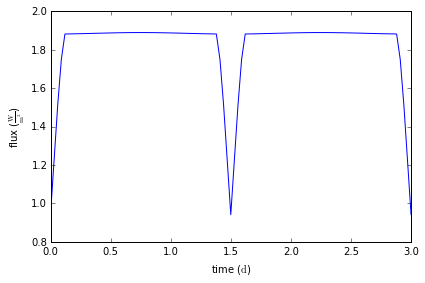

In [12]:
axs, artists = b['lc01@boosting_none'].plot()

Influence on Radial Velocities
---------------------

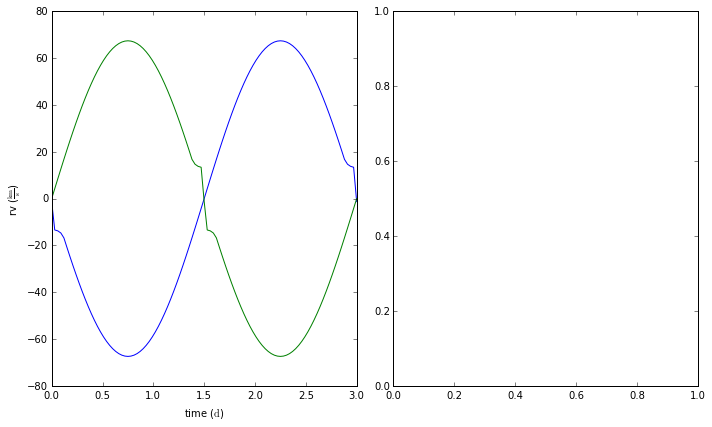

In [13]:
fig = plt.figure(figsize=(10,6))
ax1, ax2 = fig.add_subplot(121), fig.add_subplot(122)

axs, artists = b['rv01@boosting_none'].plot(ax=ax1)

Influence on Meshes
-------------------------

/home/kyle/.local/lib/python2.7/site-packages/phoebe/frontend/plotting.py:240: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if pckwargs['edgecolors'] in ['none', 'None', None] and pckwargs['facecolors'] not in ['none', 'None', None]:
/home/kyle/.local/lib/python2.7/site-packages/phoebe/frontend/plotting.py:240: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if pckwargs['edgecolors'] in ['none', 'None', None] and pckwargs['facecolors'] not in ['none', 'None', None]:
/usr/local/lib/python2.7/dist-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


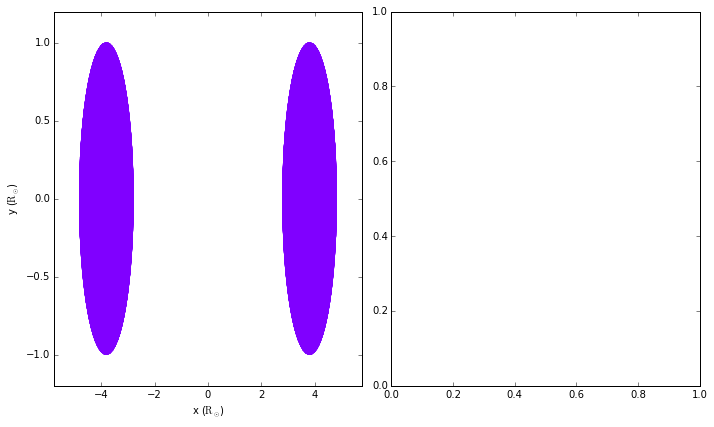

In [14]:
fig = plt.figure(figsize=(10,6))
ax1, ax2 = fig.add_subplot(121), fig.add_subplot(122)

axs, artists = b['MESH@boosting_none'].plot(time=0.6, facecolor='ampl_boost@lc01', edgecolor=None, ax=ax1)